In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter

In [86]:
### Taken from https://flynn.gg/blog/better-matplotlib-charts/
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])
#ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))

In [87]:
base = pd.read_csv('../loss_over_time_by_sector_unmitigated.csv',parse_dates=['date'])
itv = pd.read_csv('../loss_over_time_by_sector-VHI_70_SH_70_45.csv',parse_dates=['date'])
itv_label = '70%,45d'

In [88]:
base['sector'] = base['short'].apply(lambda x: x.title())
base['loss']*=10**6
base.sort_values(['sector','date'],inplace=True)
base['day'] = (base['date'] - base['date'].min()).dt.days

In [89]:
itv['sector'] = itv['short'].apply(lambda x: x.title())
itv['loss']*=10**6
itv.sort_values(['sector','date'],inplace=True)
itv['day'] = (itv['date'] - itv['date'].min()).dt.days

In [90]:
sort_base = base.pivot(index='sector',columns='day',values='loss').max(axis=1).sort_values(ascending=False).index.values
sort_itv = itv.pivot(index='sector',columns='day',values='loss').max(axis=1).sort_values(ascending=False).index.values

In [91]:
colors = dict(zip(list(base['sector'].unique()),
                  ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#000000']))

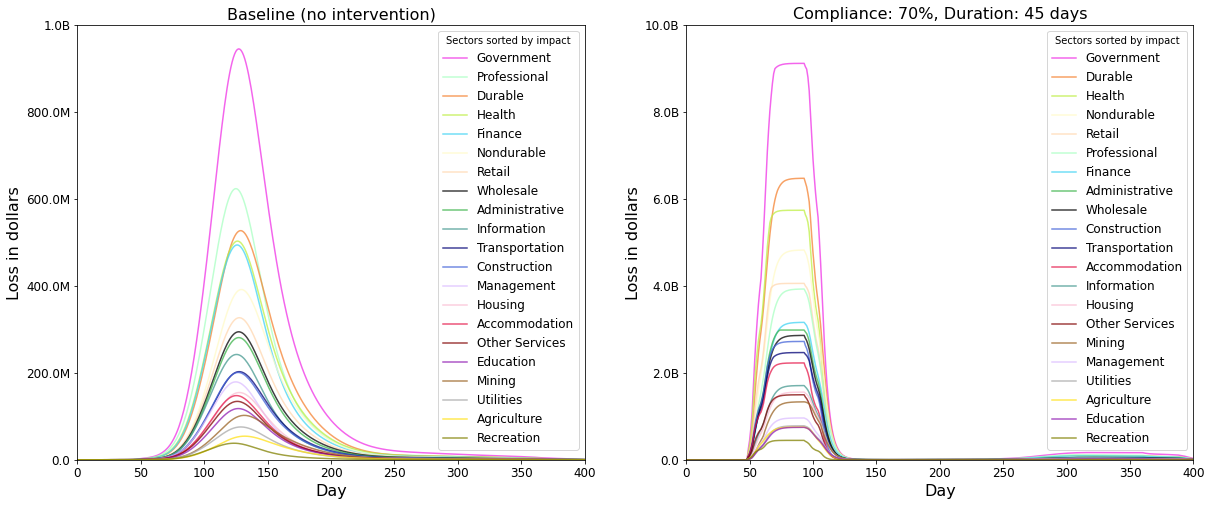

In [93]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
for s in sort_base:
    base[base.sector==s].plot(x='day',y='loss',color=colors[s],label=s,ax=axarr[0],alpha=0.75)

for s in sort_itv:
    itv[itv.sector==s].plot(x='day',y='loss',color=colors[s],label=s,ax=axarr[1],alpha=0.75)
    
axarr[0].yaxis.set_major_formatter(FuncFormatter(number_formatter))
axarr[1].yaxis.set_major_formatter(FuncFormatter(number_formatter))

axarr[0].tick_params(labelsize=12)
axarr[0].set_xlabel('Day',fontsize=16)
axarr[0].set_ylabel('Loss in dollars',fontsize=16)

axarr[1].tick_params(labelsize=12)
axarr[1].set_xlabel('Day',fontsize=16)
axarr[1].set_ylabel('Loss in dollars',fontsize=16)

axarr[0].legend(fontsize=12,title='Sectors sorted by impact',loc=1)
axarr[1].legend(fontsize=12,title='Sectors sorted by impact',loc=1)

axarr[0].set_title('Baseline (no intervention)',fontsize=16)
axarr[1].set_title('Compliance: 70%, Duration: 45 days',fontsize=16)

axarr[0].set_ylim([0,10**9])
axarr[1].set_ylim([0,10**10])

axarr[0].set_xlim([0,400])
axarr[1].set_xlim([0,400])

plt.savefig('../../fig/compare_ts_by_sector.png',bbox_inches='tight',dpi=100)